# 0.2.0 Visualization with hierarchical clustering and t-SNE

In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from sklearn.manifold import TSNE

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [45]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

from utils.auxiliares_help import varieties, eurovision, country_names, varieties2, variety_numbers

## 0.2.2 How many merges?

If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? 

R:/ 4 merges.

## 0.2.3 Hierarchical clustering of the grain data

In [5]:
seeds_dataset = pd.read_csv(path.data_raw_dir("seeds_dataset.txt"), header=None, encoding = 'utf-8', sep='\t')
samples = seeds_dataset.to_numpy()
samples

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [6]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

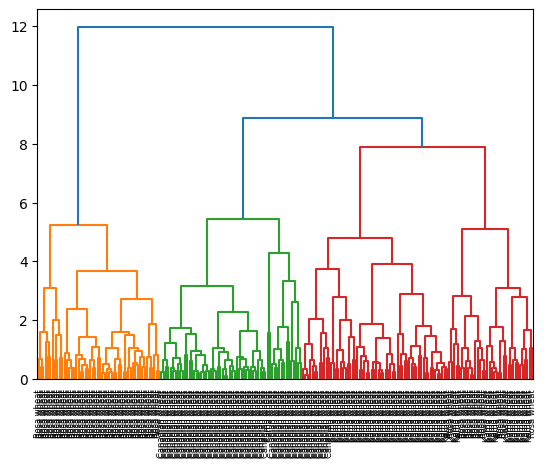

In [9]:
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## 0.2.4 Hierarchies of stocks

In [11]:
movements = pd.read_csv(path.data_raw_dir("Company stock price movements.csv"), index_col=0)
companies = movements.index.tolist()
movements = movements.to_numpy()

In [15]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

In [16]:
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

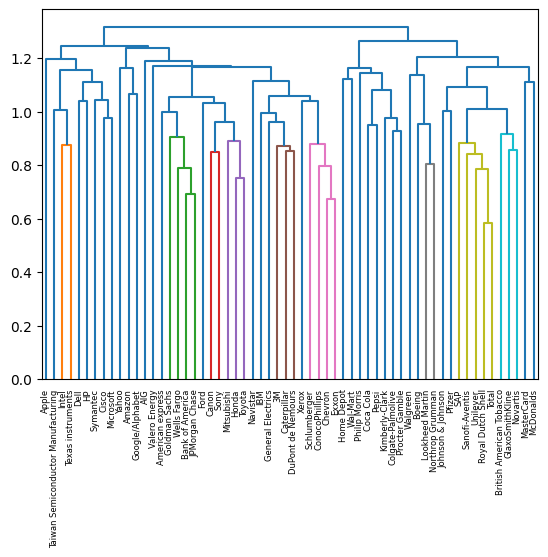

In [18]:
# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## 0.2.6 Which clusters are closest?

Consider the three clusters in the diagram. Which of the following statements are true?

R:/ 

- A. In single linkage, Cluster 3 is the closest cluster to Cluster 2.
- B. In complete linkage, Cluster 1 is the closest cluster to Cluster 2.

## 0.2.7 Different linkage, different hierarchical clustering!

In [27]:
# Calculate the linkage: mergings
mergings = linkage(eurovision, method='single')

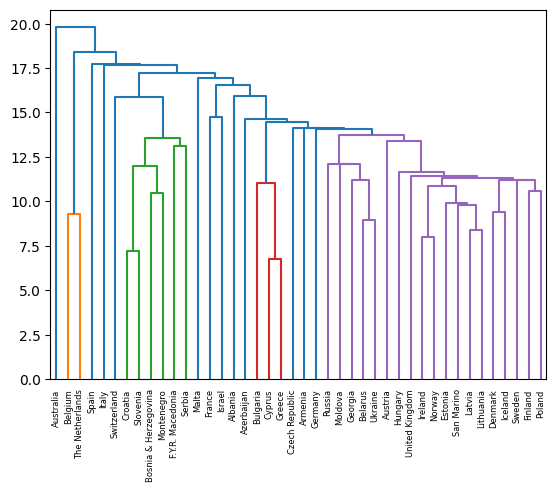

In [28]:
# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## 0.2.8 Intermediate clusterings

how many clusters would there be?

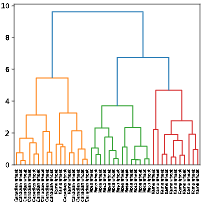

R:/ 3

## 0.2.9 Extracting the cluster labels

In [29]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

In [34]:
len(varieties)

(210, 210)

In [36]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties2})

In [37]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           1           0
2                       1           0           0
3                       0           1           0
4                       1           0           0
5                       0           1           0
6                       1           0           0
7                       0           0           1
8                       1           0           0
9                       1           0           0
10                      0           0           1
11                      0           0           1
12                      0           1           0
13                      0           0           1
14                      0           1           0
15                      0           1           0
16                      1           0           0
17                      0           0           1
18                      1           0           0


## 0.2.10 t-SNE visualization of grain dataset

In [41]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

In [42]:
# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

In [44]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

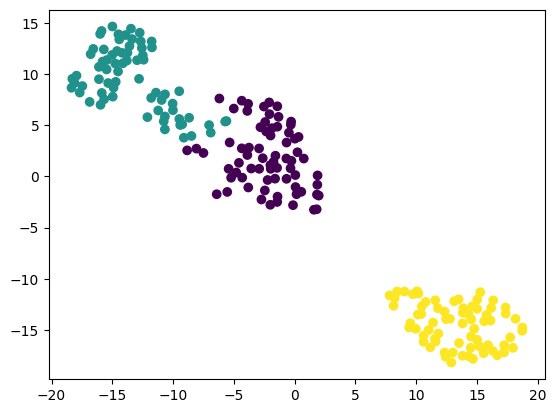

In [46]:
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

## 0.2.11 A t-SNE map of the stock market

In [49]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

In [50]:
# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

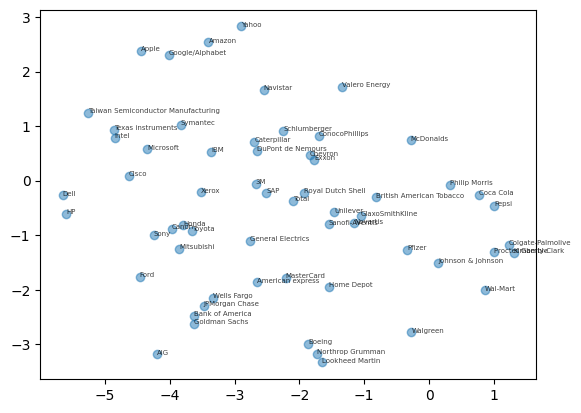

In [52]:
# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

In [21]:
print('ok_')

ok_
